In [6]:
def imshow(title = "Image", image = None, size = 20):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

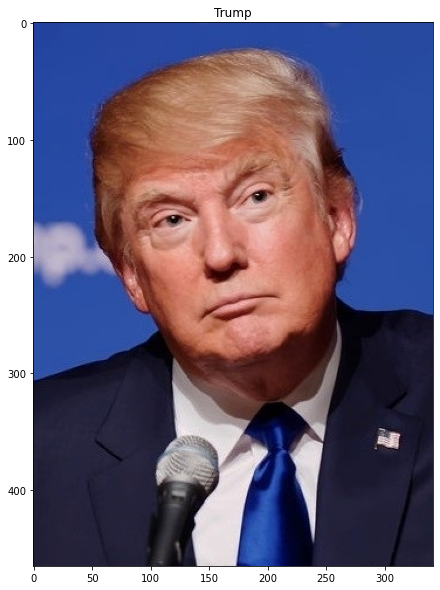

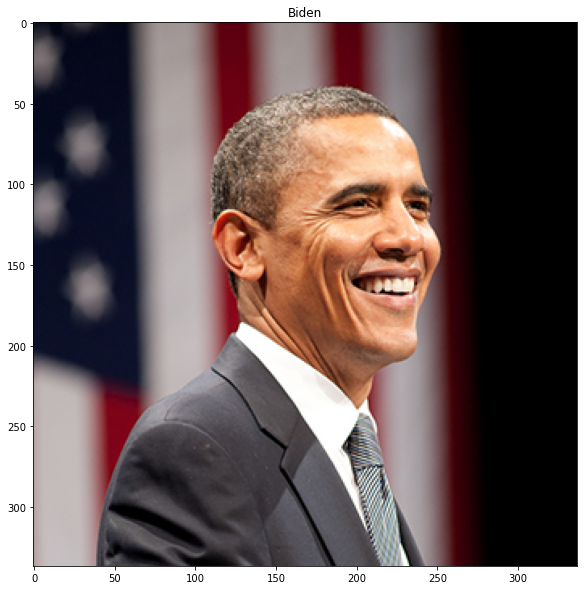

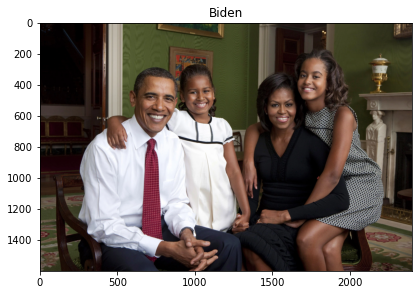

In [3]:
import cv2
from matplotlib import pyplot as plt

obama = cv2.imread('C:/Users/rajen/Computer Vision/images/images/obama.jpg')
obama2 = cv2.imread("C:/Users/rajen/Computer Vision/images/images/44_barack_obama_family.webp")
trump = cv2.imread("C:/Users/rajen/Computer Vision/images/images/Trump.jpg")

imshow('Trump', trump)
imshow('Biden', obama)
imshow('Biden', obama2)

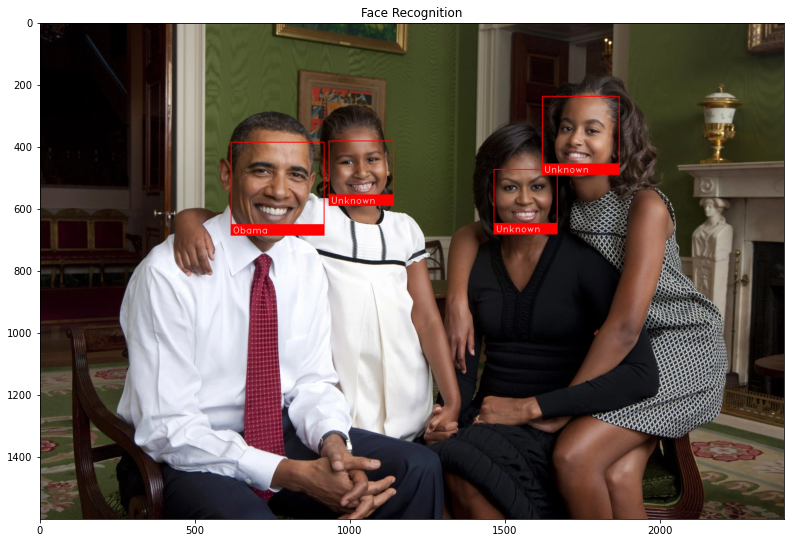

In [7]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load a sample picture and learn how to recognize it.
trump_image = face_recognition.load_image_file("C:/Users/rajen/Computer Vision/images/images/Trump.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

# Load a second sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("C:/Users/rajen/Computer Vision/images/images/obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    trump_face_encoding,
    obama_face_encoding
]
known_face_names = [
    "Donald Trump",
    "Obama"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True


# Grab a single frame of video
frame = cv2.imread('C:/Users/rajen/Computer Vision/images/images/44_barack_obama_family.webp')

# Resize frame of video to 1/4 size for faster face recognition processing
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb_small_frame = small_frame[:, :, ::-1]

# Only process every other frame of video to save time
if process_this_frame:
    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        # # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)


# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
imshow('Face Recognition', frame)